#**THE SPARK FOUNDATION**
#**GRIP-JUIY21**
#**NAME-SANDHYA KANDAGAL** **( Data Science & Business Analytics Intern)**

# **TASK-4 Exploratory Data Analysis -Terrorism**
##**Dataset-https://bit.ly/2TK5Xn5**
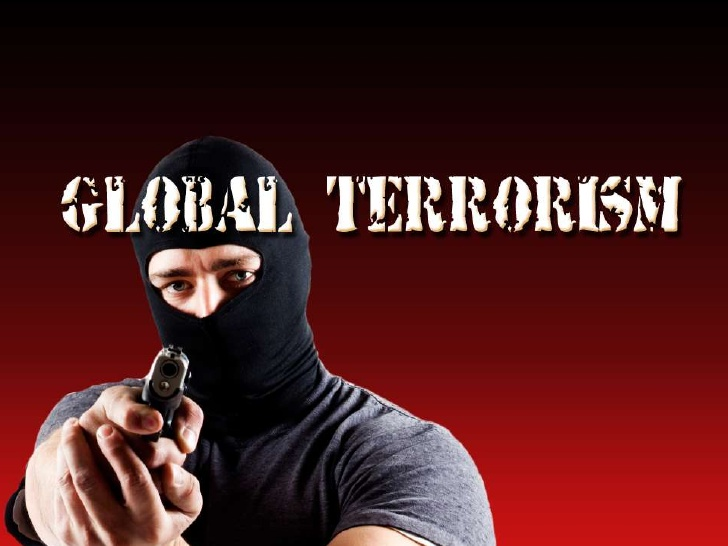

##●**Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’** 

##●**As a security/defense analyst, try to find out the hot zone of terrorism** 

##●**What all security issues and insights you can derive by EDA?** 

##**IMPORTING THE REQUIRED LIBRARIES**

In [57]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings 
warnings.filterwarnings("ignore")

##**READING THE GIVEN DATASET**

In [58]:
t_data=pd.read_csv("/globalterrorismdb_0718dist.csv",encoding='latin1')
print('Data Imported successfully')
t_data.head(5)



Data Imported successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [59]:
t_data.shape

(181691, 135)

###We observe here ,that there are 181691 rows and 135 columns, large dataset.

In [60]:
t_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


##**PRINTING THE COLUMNS**

In [61]:
t_data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

##**RENAMING THE COLUMNS FOR EASY UNDERSTANDING**

In [62]:
t_data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country',
                     'region_txt':'Region','provstate':'State','city':'City','latitude':'latitude','longitude':'longitude',
                     'summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype',
                     'targsubtype1_txt':'Targetsubtype','weaptype1_txt':'Weapon','nkill':'kill','nwound':'Wound'},inplace=True)

##**CHECKING THE RENAMED COLUMNS BY PRINTING THE DATA**

In [63]:
t_data.head()

,eventid,Year,Month,day,approxdate,extended,resolution,country,Country,region,Region,State,City,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,Attacktype,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Targettype,targsubtype1,Targetsubtype,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,kill,nkillus,nkillter,Wound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


##**SELECTING THE RELEVANT COLUMNS FOR EDA**

In [64]:
eda_data=t_data[['Year','Month','day','Country','State','City','Region',"Attacktype",
                "Targettype",'Targetsubtype','kill', 'Wound','target1','Group','Weapon']]

eda_data.head()

,Year,Month,day,Country,State,City,Region,Attacktype,Targettype,Targetsubtype,kill,Wound,target1,Group,Weapon
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,Private Citizens & Property,Named Civilian,1.0,0.0,Julio Guzman,MANO-D,Unknown
1,1970,0,0,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Unknown
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,1.0,0.0,Employee,Unknown,Unknown
3,1970,1,0,Greece,Attica,Athens,Western Europe,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,NaN,U.S. Embassy,Unknown,Explosives
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,NaN,U.S. Consulate,Unknown,Incendiary


####After observing the data we found that some of the columns were not relevant and useful .So,I imported only the required columns and read them into eda_data,and printed them.

##**NOW LETS CHECK THE ROWS AND COLUMNS**

In [65]:
eda_data.shape

(181691, 15)

In [66]:
eda_data.describe()

,Year,Month,day,kill,Wound
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


##**CHECKING FOR THE NULL VALUES**

In [67]:
eda_data.isnull().sum()

Year                 0
Month                0
day                  0
Country              0
State              421
City               434
Region               0
Attacktype           0
Targettype           0
Targetsubtype    10373
kill             10313
Wound            16311
target1            636
Group                0
Weapon               0
dtype: int64

In [68]:
eda_data.dtypes

Year               int64
Month              int64
day                int64
Country           object
State             object
City              object
Region            object
Attacktype        object
Targettype        object
Targetsubtype     object
kill             float64
Wound            float64
target1           object
Group             object
Weapon            object
dtype: object

##**FILLING UP THE MISSING VALUES**

In [69]:
eda_data['State'].fillna(value="NAN",inplace=True)
eda_data['City'].fillna(value="NAN",inplace=True)
eda_data['target1'].fillna(value="NAN",inplace=True)
eda_data['Targetsubtype'].fillna(value="NAN",inplace=True)
eda_data['Wound'] = eda_data['Wound'].fillna(0)
eda_data['kill'] = eda_data['kill'].fillna(0)

In [26]:
eda_data.isnull().sum()

Year             0
Month            0
day              0
Country          0
State            0
City             0
Region           0
Attacktype       0
Targettype       0
Targetsubtype    0
kill             0
Wound            0
target1          0
Group            0
Weapon           0
dtype: int64

####Re checking the missing values,we did not find any missing values.

##**LETS VISUALLY UNDERSTAND THE DATA BY PLOTTING**

In [70]:
eda_data['Year'].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

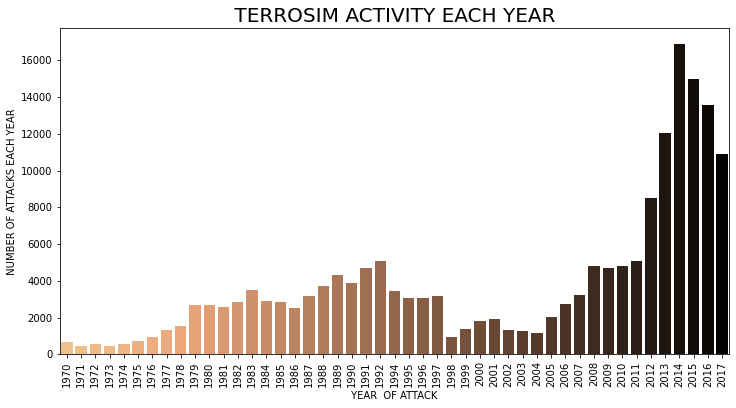

In [71]:
year=eda_data['Year'].unique()
count_of_years=eda_data['Year'].value_counts().sort_index()
plt.figure(figsize = (12,6))
sns.barplot(x=year,y=count_of_years,palette='copper_r')
plt.xticks(rotation = 90)
plt.xlabel(' YEAR  OF ATTACK ')
plt.ylabel(' NUMBER OF ATTACKS EACH YEAR ')
plt.title(' TERROSIM ACTIVITY EACH YEAR ',fontsize=20)
plt.show()


##**FROM THE ABOVE PLOT,WE CAN CONCLUDE THAT *YEAR 2014* HAD THE HIGHEST TERRORIST ACTIVITES,THE TERROR ATTACK INCREASED GRADUALLY FROM 1970's**

---



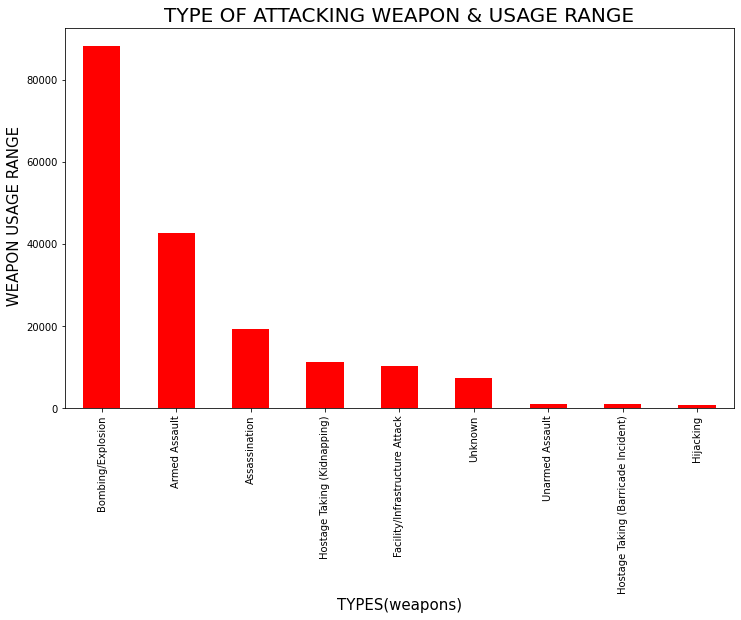

In [72]:
eda_data['Attacktype'].value_counts().plot(kind='bar',figsize=(12,7),color='red')
plt.xticks(rotation = 90)
plt.xlabel("TYPES(weapons)",fontsize=15)
plt.ylabel(" WEAPON USAGE RANGE",fontsize=15)
plt.title("TYPE OF ATTACKING WEAPON & USAGE RANGE",fontsize=20)
plt.show()

##**FROM THE ABOVE PLOT, I CONCLUDE THAT *BOMBING/EXPLOSION(wepon)* IS HIGHLY INVOLVED ATTACKING WEAPON TYPE IN TERRORISM**

---



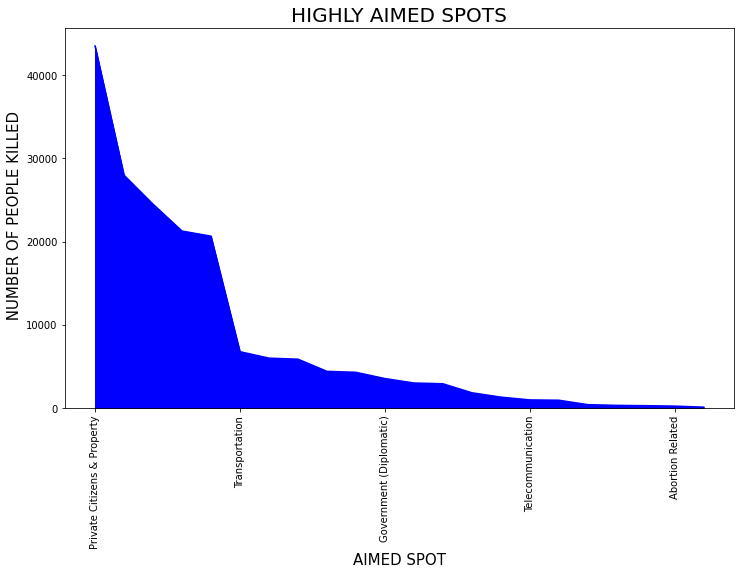

In [73]:
eda_data['Targettype'].value_counts().plot(kind='area',figsize=(12,7),color='blue')
plt.xticks(rotation = 90)
plt.xlabel("AIMED SPOT",fontsize=15)
plt.ylabel(" NUMBER OF PEOPLE KILLED",fontsize=15)
plt.title("HIGHLY AIMED SPOTS",fontsize=20)
plt.show()

##**FROM THE ABOVE PLOT, I CONCLUDE THAT PUBLIC PLACES ARE HIGHLY ATTACKED PLACES OR SPOTS(TARGET).**

---



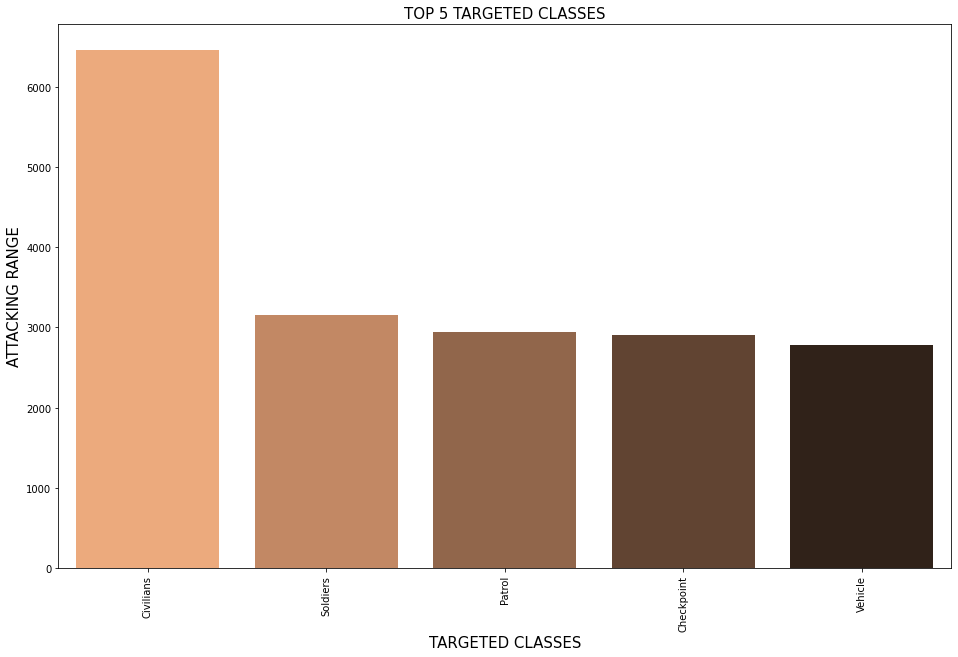

In [74]:
plt.figure(figsize= (16,10))
sns.barplot(x = eda_data['target1'].value_counts().drop('Unknown').nlargest(n=5).index , y = eda_data['target1'].value_counts().drop('Unknown').nlargest(n=5).values,palette='copper_r')
plt.title('TOP 5 TARGETED CLASSES',fontsize=15)
plt.xlabel('TARGETED CLASSES',fontsize=15)
plt.ylabel('ATTACKING RANGE',fontsize=15)
plt.xticks(rotation = 90)
plt.show()

##**FROM THE ABOVE PLOT, I CONCLUDE THAT CIVILIANS ARE HIGHLY TARGETRD/ATTACKED CLASS.**

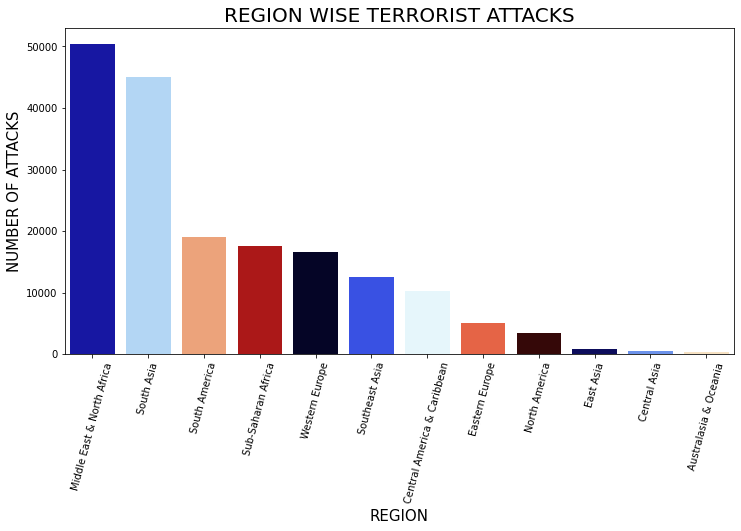

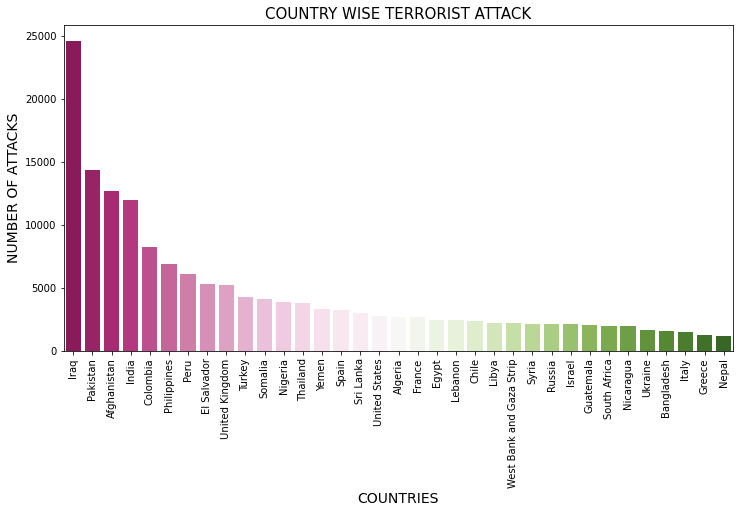

In [75]:
#REGON WISE
plt.subplots(figsize=(12,6))
sns.countplot('Region',data=eda_data,palette='flag_r',order=eda_data['Region'].value_counts().index)
plt.xticks(rotation=75)
plt.xlabel('REGION',fontsize=15)
plt.ylabel("NUMBER OF ATTACKS",fontsize=15)
plt.title('REGION WISE TERRORIST ATTACKS',fontsize=20)
plt.show()

#COUNTRY WISE
plt.subplots(figsize=(12,6))
sns.countplot('Country',data=eda_data,palette='PiYG',order=eda_data['Country'].value_counts()[:35].index)
plt.xticks(rotation=90)
plt.xlabel('COUNTRIES',fontsize=14)
plt.ylabel("NUMBER OF ATTACKS",fontsize=14)
plt.title('COUNTRY WISE TERRORIST ATTACK',fontsize=15)
plt.show()

##**FROM THE ABOVE PLOTS, I CAN SAY REGION WISE MIDDLEEAST AND NORTH AFRICA HAS HIGHEST FREQUENCY OF ATTACKS FOLLOWED BY SOUTH ASIA.**
##**COUNTRY WISE IRAQ STANDS FIRST, WHERE AS NEPAL WITH LEAST TERRORIST ATTACKS.**

---





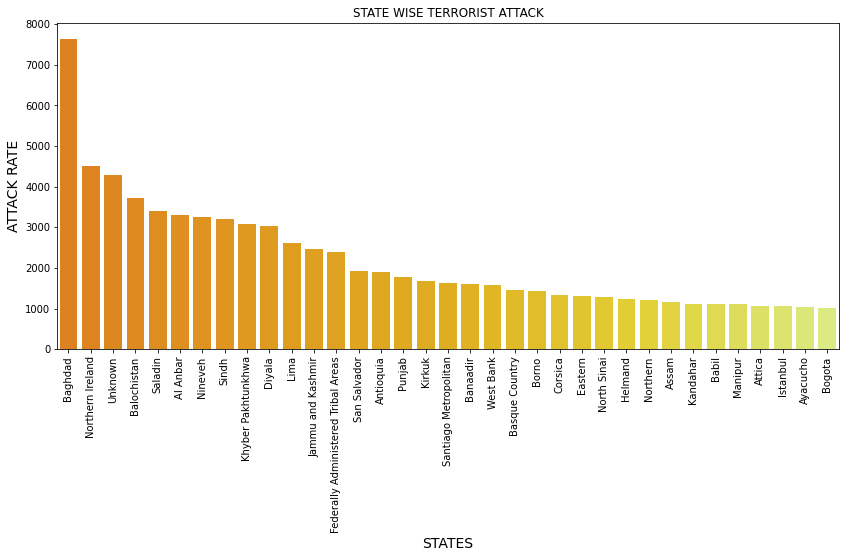

In [76]:
plt.subplots(figsize=(14,6))
sns.countplot('State',data=eda_data,palette='Wistia_r',order=eda_data['State'].value_counts()[:35].index)
plt.xticks(rotation=90)
plt.xlabel('STATES',fontsize=14)
plt.ylabel("ATTACK RATE",fontsize=14)
plt.title('STATE WISE TERRORIST ATTACK')
plt.show()


##**FROM ABOVE PLOT, I CONCLUDE THAT THE STATE WISE BAGHDAD HAS HIGHEST FREQUENCY  TERRORIST ATTACKS.**

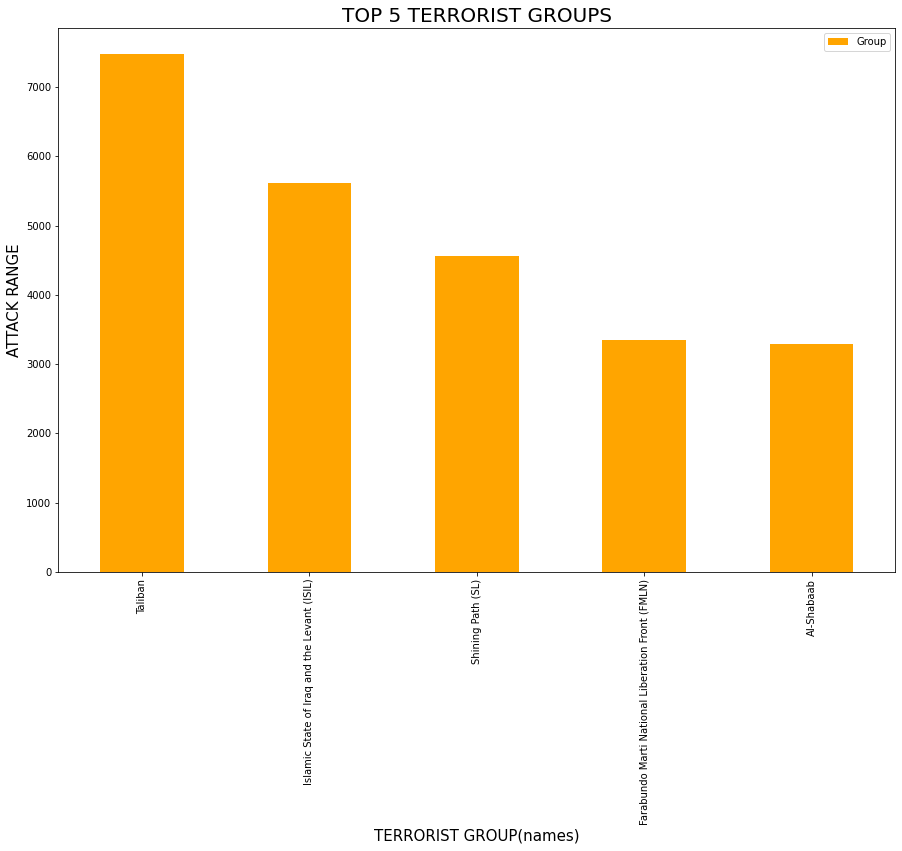

In [77]:
eda_data['Group'].value_counts().to_frame().drop('Unknown').head(5).plot(kind='bar',color='Orange',figsize=(15,10))
plt.xticks(rotation=90)
plt.title("TOP 5 TERRORIST GROUPS",fontsize=20)
plt.xlabel("TERRORIST GROUP(names)",fontsize=15)
plt.ylabel("ATTACK RANGE",fontsize=15)
plt.show()

##**FROM THE ABOVE PLOT, I CONCLUDE THAT (TALIBAN) TERRORIST GROUP IS MORE ACTIVE FOLLOWED BY(ISIL).**

****

##**INSIGHTS ACQUIRED BY PERFORMING EDA ARE AS FOLLOWS**

1.   *YEAR 2014* HAD THE HIGHEST TERRORIST ACTIVITES,TERRORIST ATTACKS INCREASED GRADUALLY FROM 1970's.
2.   **BOMBING/EXPLOSION(weapon)** IS HIGHLY INVOLVED ATTACKING WEAPON TYPE IN TERRORISM.

1.   PUBLIC PLACES ARE HIGHLY ATTACKED PLACES OR SPOTS(TARGET).
2.  THE **CIVILIANS** ARE HIGHLY TARGETRD/ATTACKED CLASS.

1.   REGION WISE **MIDDLEEAST AND NORTH AFRICA HAS HIGHEST FREQUENCY OF ATTACKS FOLLOWED BY SOUTH ASIA**.
2.   COUNTRY WISE **IRAQ STANDS FIRST**, WHERE AS **NEPAL WITH LEAST TERRORIST ATTACKS**(SECURED COUNTRY).

1.   STATE WISE **BAGHDAD HAS HIGHEST FREQUENCY  TERRORIST ATTACKS.**
2.   **TALIBAN** TERRORIST GROUP IS MORE ACTIVE FOLLOWED BY**(ISIL)** IN TERRORISM.










